In [255]:
import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from itertools import dropwhile

In [2]:
ecdc_path = '../Datasets/DLL/ECDC/DLL_COVID_TRAIN.csv'

In [27]:
data = pd.read_csv(ecdc_path, parse_dates=['dateRep'])
data['dates'] = data['dateRep'].dt.date
data.head()

,countryterritoryCode,dateRep,cases,deaths,countriesAndTerritories,popData2018,GDP (current US$),GDP per capita (current US$),Access to electricity (% of population),Current health expenditure per capita (current US$),Current health expenditure (% of GDP),"Hospital beds (per 1,000 people)",dates
0,AFG,2020-04-18,51,1,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5,2020-04-18
1,AFG,2020-04-17,10,4,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5,2020-04-17
2,AFG,2020-04-16,70,2,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5,2020-04-16
3,AFG,2020-04-15,49,2,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5,2020-04-15
4,AFG,2020-04-14,58,3,Afghanistan,37172386.0,1.936297e+10,520.896603,97.7,67.12265,11.777194,0.5,2020-04-14


In [5]:
country_keys = list(set(data['countryterritoryCode']))

In [30]:
country='AFG'
afg = data[data.countryterritoryCode=='AFG']


In [6]:
country_data = {}
for key in country_keys:
    d = data[data.countryterritoryCode==key]
    country_data[key] = d

In [32]:
afg = country_data['AFG']
dates = list(afg.dateRep)
cases = list(afg.cases)
dates.reverse()
cases.reverse()

In [33]:
dates = afg.dateRep
type(dates[0])

pandas._libs.tslibs.timestamps.Timestamp

In [9]:
len(data.countryterritoryCode.unique())

202

In [10]:
missing = data[(data.isnull().any(axis=1))]
missing_countries = missing.countryterritoryCode.unique()

In [13]:
full_data = data[~data.countryterritoryCode.isin(missing_countries)]
full_data.isnull().values.any()

country_info = full_data[(full_data['dateRep'] == '2020-04-18')]
#country_info

In [14]:
X = country_info.iloc[:, [7, 8, 9, 11]].values
countries = list(country_info.iloc[:, 0].values)

#countries

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import KernelPCA as PCA

X_scaled = StandardScaler().fit_transform(X)
pca = PCA(n_components=3, kernel='cosine').fit(X_scaled)

#pca.explained_variance_ratio_

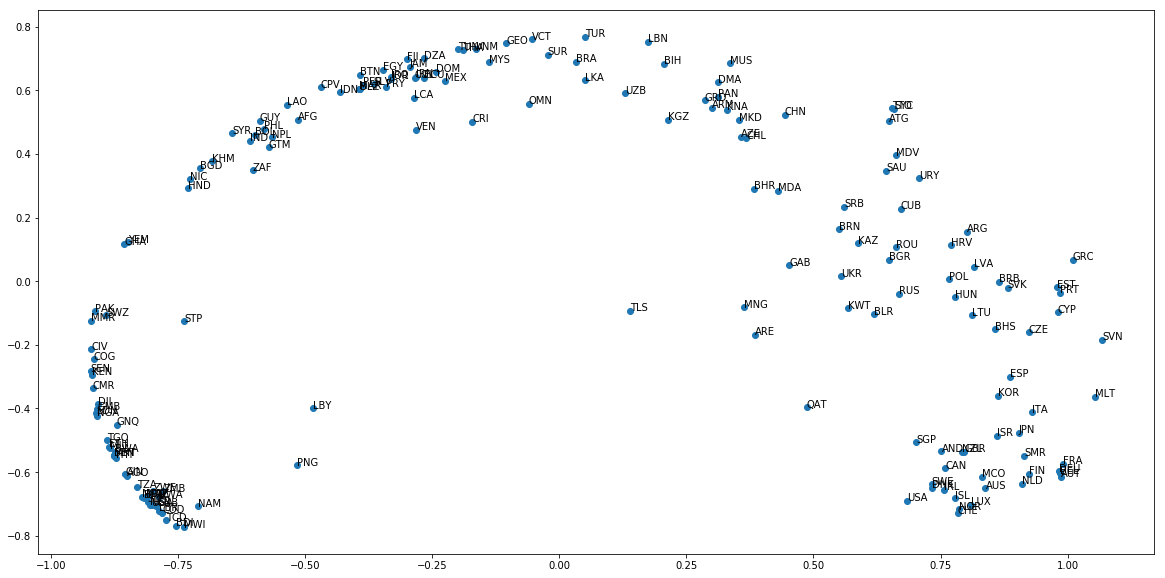

In [16]:
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['figure.figsize'] = [20, 10]

X_projected = pca.transform(X_scaled)

fig, ax = plt.subplots()
ax.scatter(X_projected[:, 0], X_projected[:, 1])

for i, txt in enumerate(countries):
    ax.annotate(txt, (X_projected[i, 0], X_projected[i, 1]))

plt.show()

In [17]:
from sklearn.cluster import KMeans

clusters = KMeans(n_clusters=5).fit_predict(X_projected)

In [18]:
interesting = [countries.index(e) for e in ['NAM', 'PAK', 'CIV', 'CMR', 'SEN']]
print(clusters[interesting])

[2 2 2 2 2]


In [179]:
pca.lambdas_

array([30.92985761, 24.67615599])

In [19]:
all_data = data.loc[(data['dateRep'] == '2020-04-18')]
print(len(all_data))
#all_data

202


In [20]:
from sklearn.cluster import KMeans

In [154]:
chn = country_data['CHN']
ch_dates = list(chn['dates'])
ch_deaths = list(chn['deaths'])
ch_dates.reverse()
ch_deaths.reverse()

In [47]:
import scipy
import scipy.stats
from scipy.optimize import curve_fit

In [96]:
def f(t, a, b, c):
    return np.exp(a-(a-b)*np.exp(-c*t))

In [97]:
cum_cases = np.array(ch_cases).cumsum()
cum_cases

NameError: name 'ch_cases' is not defined

In [155]:
ch_cum_deaths = np.array(ch_deaths).cumsum()
ch_cum_deaths

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          1,    1,    1,    1,    2,    2,    2,    2,    3,    3,    6,
         17,   17,   26,   41,   56,   81,  106,  132,  170,  213,  259,
        304,  361,  426,  492,  564,  637,  723,  812,  909, 1017, 1114,
       1368, 1381, 1524, 1666, 1771, 1869, 2008, 2120, 2238, 2347, 2445,
       2595, 2665, 2717, 2746, 2790, 2837, 2872, 2914, 2946, 2983, 3014,
       3044, 3072, 3099, 3122, 3139, 3161, 3172, 3179, 3194, 3203, 3216,
       3225, 3241, 3249, 3253, 3259, 3265, 3274, 3281, 3285, 3291, 3296,
       3299, 3304, 3306, 3309, 3310, 3316, 3326, 3330, 3333, 3335, 3335,
       3337, 3339, 3340, 3343, 3343, 3345, 3345, 3346, 3346, 4636, 4636])

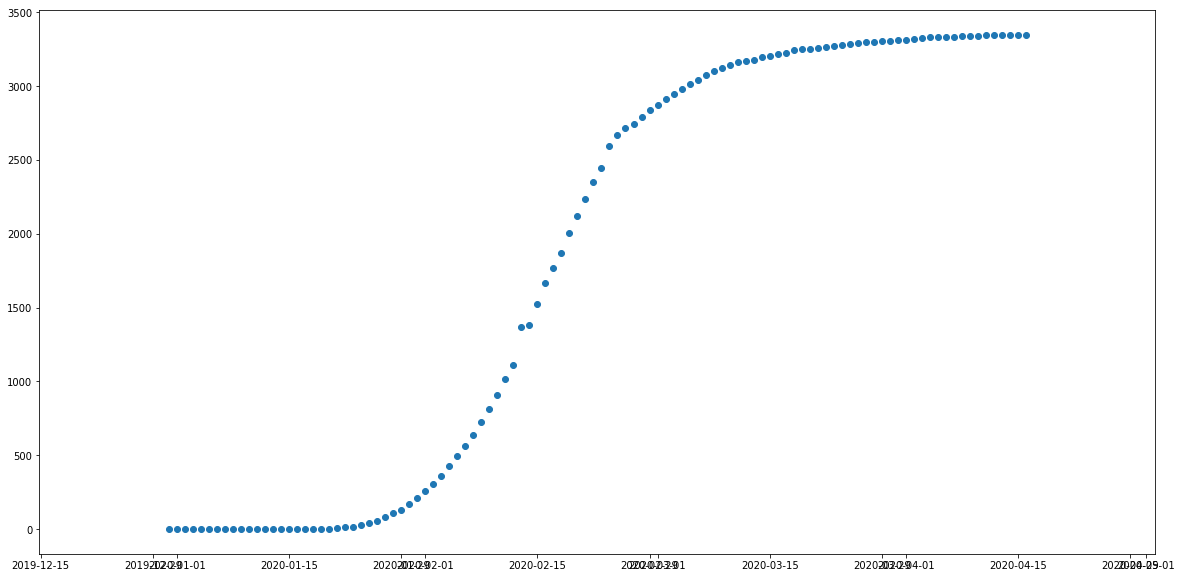

In [160]:
plt.scatter(ch_dates[:-2], ch_cum_deaths[:-2])

In [161]:
x = np.array([i for i in range(len(ch_dates))])
y = np.array(ch_cum_deaths)

In [166]:
popt, pcov = curve_fit(f, x[:-30], y[:-30])
popt

array([  8.12626147, -62.22495134,   0.09853767])

In [70]:
#popt = np.array([8.44651072, 7.65730202, 0.10541418]) # optimal

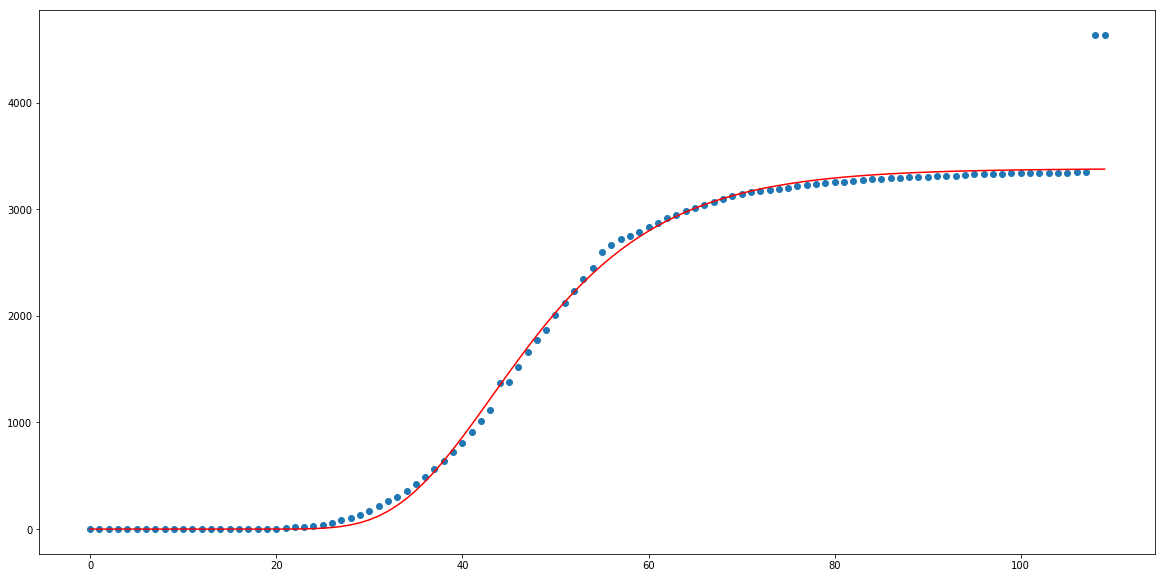

In [167]:
plt.scatter(x, y)
plt.plot(x, f(x, *popt), 'r-')
plt.show()

In [106]:
ita = country_data['ITA']
it_dates = list(ita['dates'])
it_deaths = list(ita['deaths'])
it_dates.reverse()
it_deaths.reverse()
it_cum_deaths = np.array(it_deaths).cumsum()

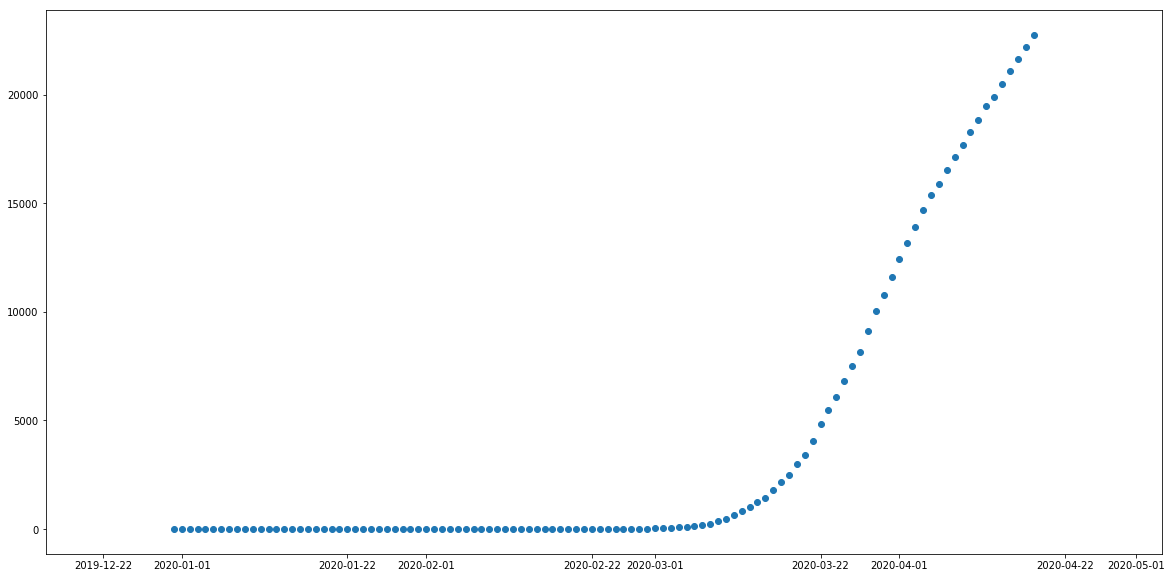

In [107]:
plt.scatter(it_dates, it_cum_deaths)

In [115]:
def sigmoid(x, a, b):
    return a / (1 + np.exp(-b*x))

In [168]:
it_cum_deaths = np.array(it_deaths).cumsum()
x = np.array([i for i in range(len(it_dates))])
y = np.array(it_cum_deaths)

In [171]:
popt, pcov = curve_fit(f, x[:-10], y[:-10])
popt

array([ 1.02608665e+01, -8.03351178e+02,  7.46656874e-02])

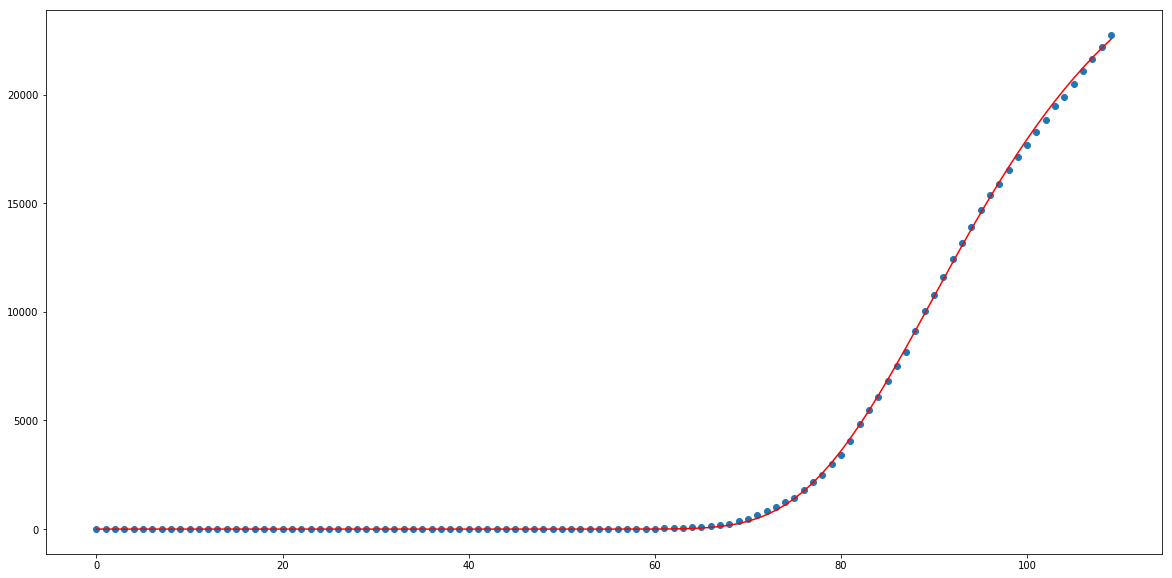

In [172]:
plt.scatter(x, y)
plt.plot(x, f(x, *popt), 'r-')
plt.show()

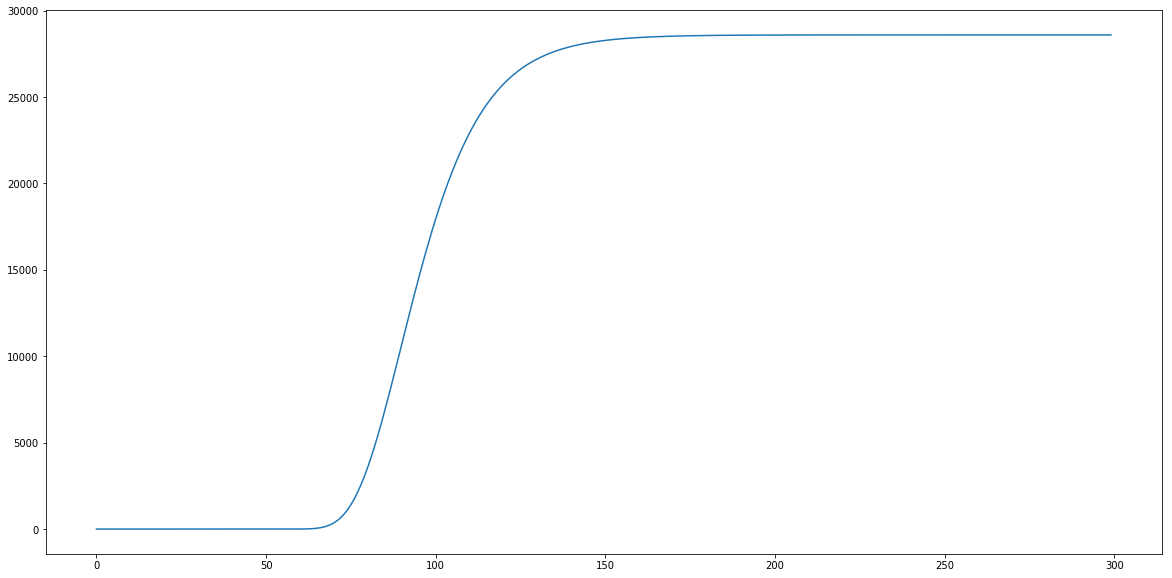

In [174]:
test_x = np.array(list(range(300)))
plt.plot(test_x, f(test_x, *popt))

In [175]:
hrv = country_data['HRV']
hr_dates = list(hrv['dates'])
hr_deaths = list(hrv['deaths'])
hr_dates.reverse()
hr_deaths.reverse()
hr_cum_deaths = np.array(hr_deaths).cumsum()

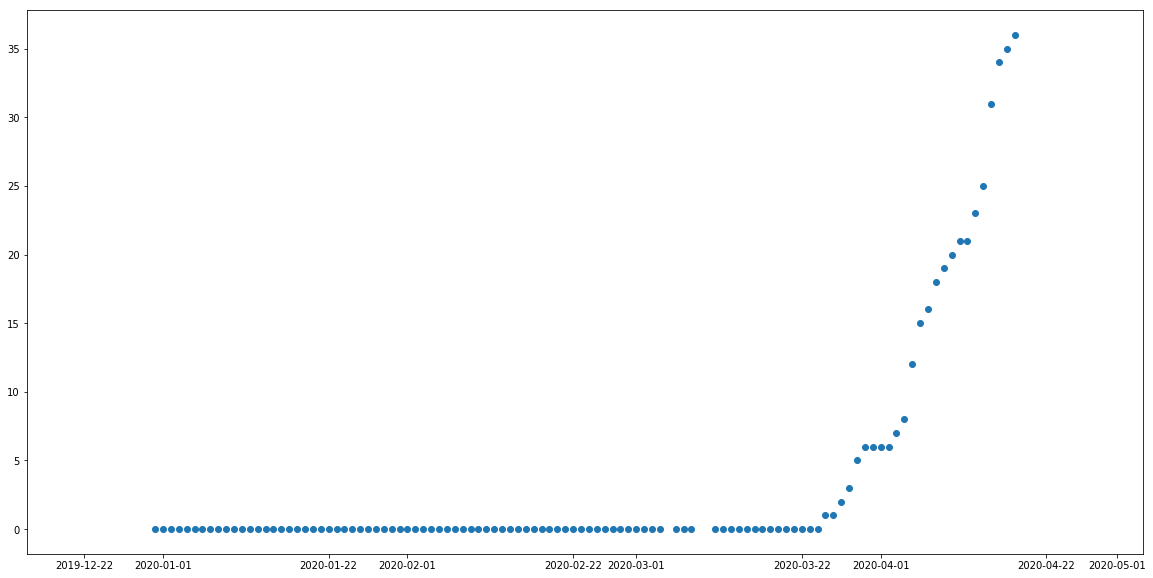

In [176]:
plt.scatter(hr_dates, hr_cum_deaths)

In [177]:
hr_cum_deaths = np.array(hr_deaths).cumsum()
x = np.array([i for i in range(len(hr_dates))])
y = np.array(hr_cum_deaths)

In [178]:
popt, pcov = curve_fit(f, x[:-10], y[:-10])
popt

array([ 5.99911623e+00, -2.10586642e+02,  4.42370423e-02])

In [ ]:
plt.scatter(x, y)
plt.plot(x, f(x, *popt), 'r-')
plt.show()

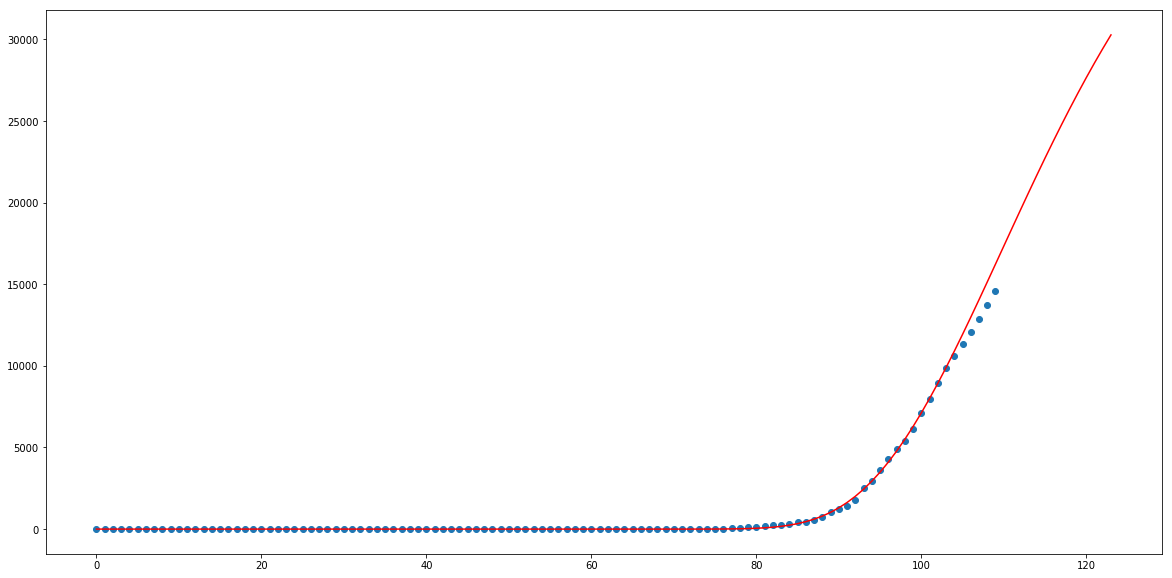

In [225]:
country = country_data['GBR']
dates = list(country['dates'])
deaths = list(country['deaths'])
dates.reverse()
deaths.reverse()
cum_deaths = np.array(deaths).cumsum()

x = np.array([i for i in range(len(dates))])
y = np.array(cum_deaths)

#plt.scatter(x, y)
#plt.show()

popt, pcov = curve_fit(f, x[:-7], y[:-7])

test = np.arange(len(x)+14)
plt.scatter(x, y)
plt.plot(test, f(test, *popt), 'r-')
plt.show()

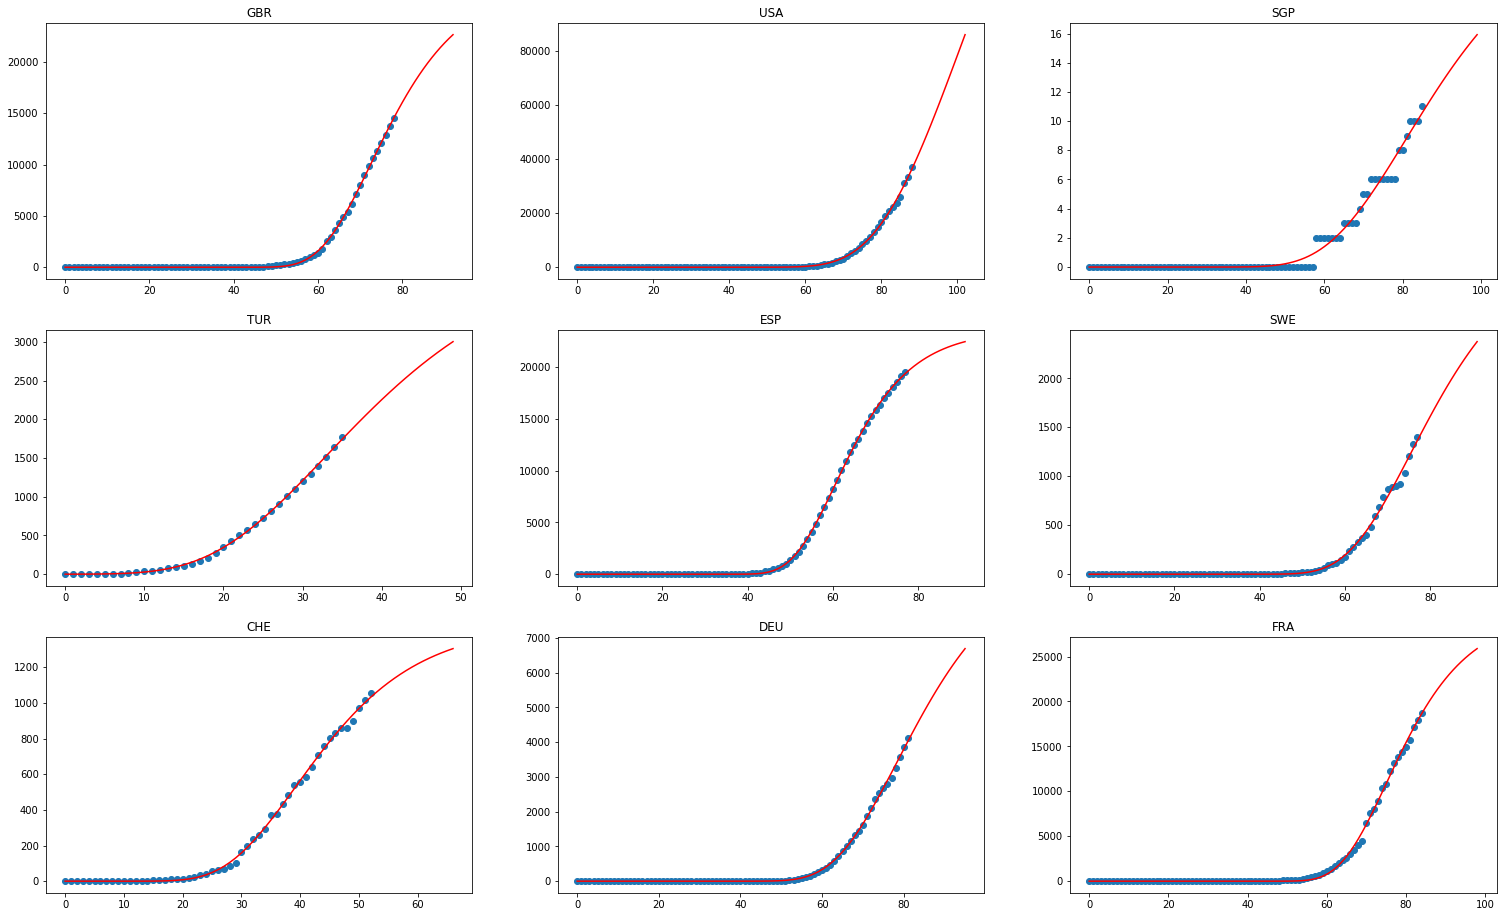

In [325]:
import matplotlib.pyplot as plt

countries = ['GBR', 'USA', 'SGP', 'TUR', 'ESP', 'SWE', 'CHE', 'DEU', 'FRA', ]
fig, axs = plt.subplots(3, 3, figsize=(26, 16))
axs = axs.flatten()

country_params = {}

for i, key in enumerate(countries):
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()

    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]

    x = np.array([i for i in range(len(dates))])
    y = np.array(cum_deaths)

    #plt.scatter(x, y)
    #plt.show()

    popt, pcov = curve_fit(f, x, y)

    test = np.arange(len(x)+14)
    axs[i].scatter(x, y)
    axs[i].plot(test, f(test, *popt), 'r-')
    axs[i].set_title(key)
    
#plt.show()

In [16]:
country = country_data['LBY']
dates = list(country['dates'])
cases = list(country['cases'])
deaths = list(country['deaths'])
dates.reverse()
cases.reverse()
deaths.reverse()
dates = np.array(dates)
cum_cases = np.array(cases).cumsum()
cum_deaths = np.array(deaths).cumsum()

cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
dates = dates[-len(cum_cases):]
cum_deaths = cum_deaths[-len(cum_cases):]

x = np.array(range(len(dates)))
y = np.array(cum_deaths)

#plt.scatter(x, y)
#plt.show()

popt, pcov = curve_fit(f, x[:], y[:])

test = np.arange(90)
plt.scatter(x[:], y[:])
plt.plot(test, f(test, *popt), 'r-')
plt.show()

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 800.

In [17]:
import os
import pandas as pd
import numpy as np
import torch
import matplotlib.pyplot as plt
from itertools import dropwhile
from scipy.optimize import curve_fit

ecdc_path = '../Datasets/DLL/ECDC/DLL_COVID_TRAIN.csv'

data = pd.read_csv(ecdc_path, parse_dates=['dateRep'])
data['dates'] = data['dateRep'].dt.date
# data.head()

country_keys = list(set(data['countryterritoryCode']))

country_data = {}
for key in country_keys:
    d = data[data.countryterritoryCode==key]
    country_data[key] = d


In [18]:
def f(t, a, b, c):
    return np.exp(a-(a-b)*np.exp(-c*t))

In [22]:
country_params = {}

countries = ['GBR', 'USA', 'SGP', 'TUR', 'ESP', 'SWE', 'CHE', 'DEU', 'FRA', 'BEL', 'NLD']
#fig, axs = plt.subplots(3, 3, figsize=(26, 16))
#axs = axs.flatten()

for i, key in enumerate(countries):
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()

    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]

    params = {}
    for start in range(len(new_dates)-50):  # start iterira od kad se pojavio prvi slucaj do danas-50
        dates_since_first = list(range(start:start+50))
        current_cases = list(cases[start:start+50])
        current_deaths = list(deaths[start:start+50])
        
        outputs =
        
        x = np.array(range(50))  # x: 0-49
        y = np.array(cum_deaths[start:start+50])  # broj smrti od start do start+50
        try:
            popt, pcov = curve_fit(f, x, y)  # fit krivulje na podacima od start do start+50
            params[new_dates[start+50]] = (popt, pcov)  # key: dan
        except RuntimeError:
            continue
        
    country_params[key] = params

    #test = np.arange(len(x)+14)
    #axs[i].scatter(x, y)
    #axs[i].plot(test, f(test, *popt), 'r-')
    #axs[i].set_title(key)
    
#plt.show()

SyntaxError: invalid syntax (<ipython-input-22-6c6e4de12497>, line 25)

In [9]:
l = [len(v) for k, v in country_params.items()]

In [10]:
sum(l)

220

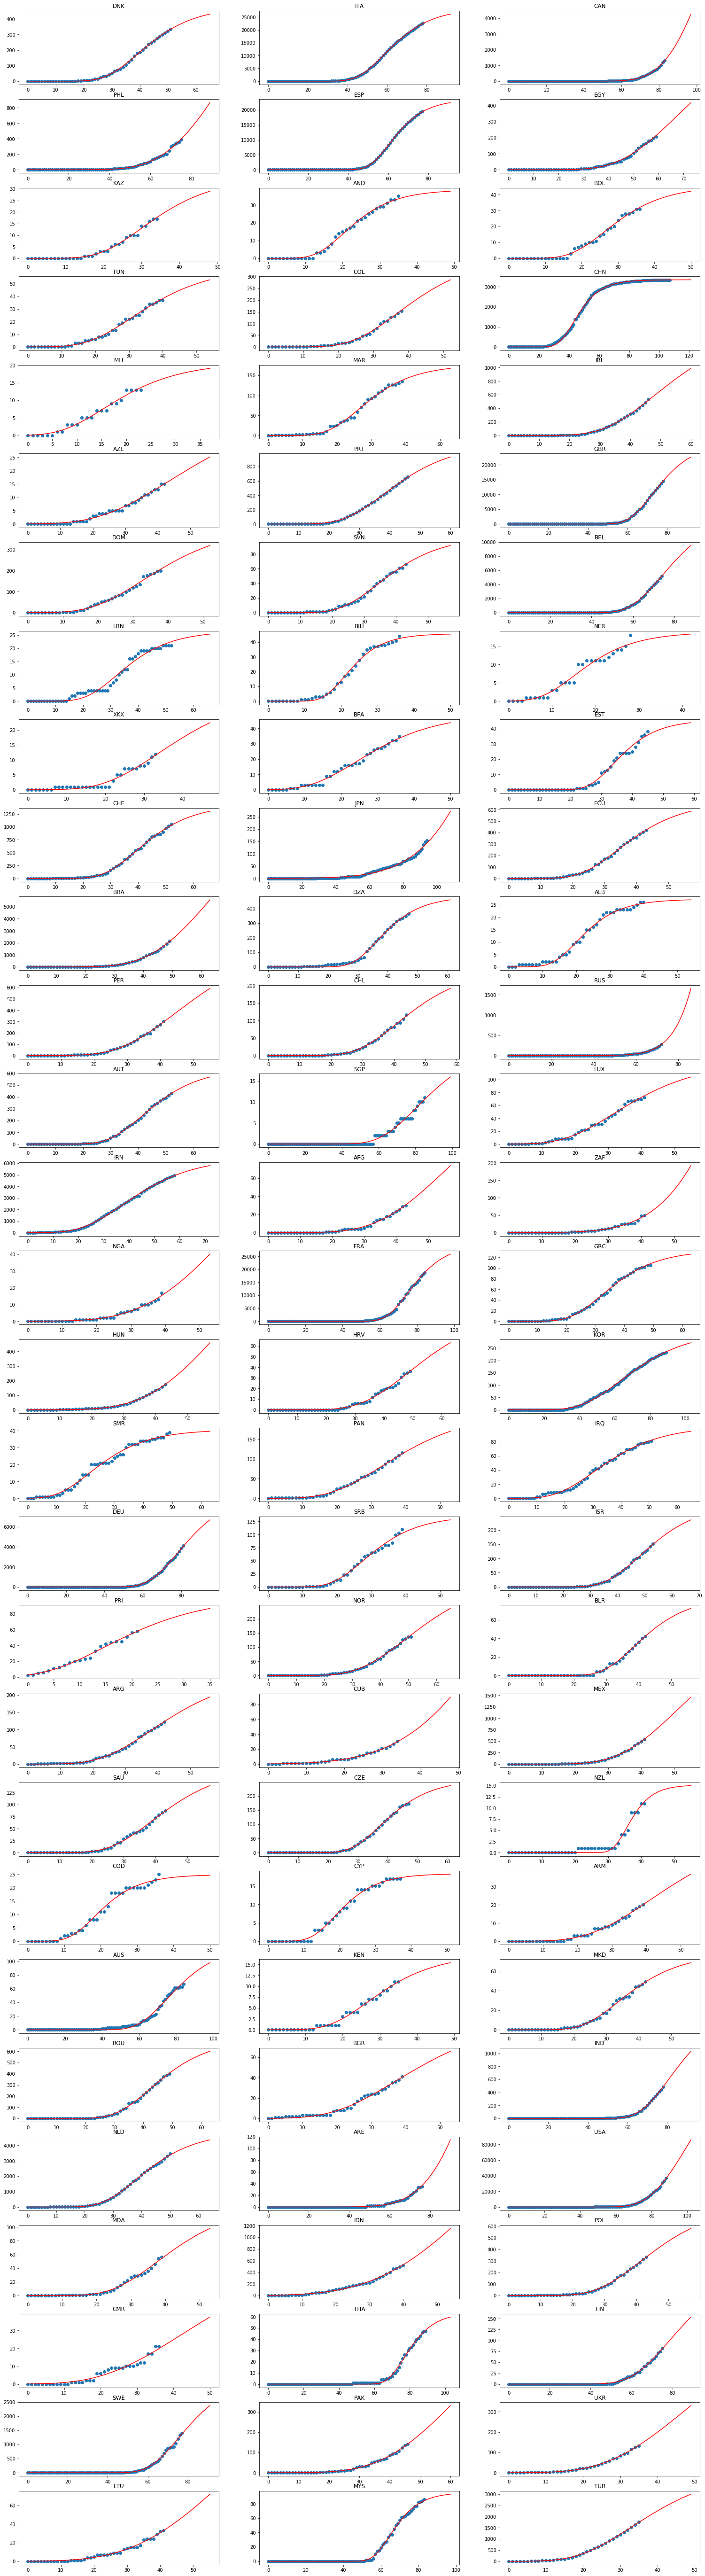

<Figure size 432x288 with 0 Axes>

In [77]:
fig, axs = plt.subplots(29, 3, figsize=(26, 100))
axs = axs.flatten()
conv = []
no_conv = []
i = 0

output_fitted = {}

for key in country_keys:
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()

    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    if key == 'CHN':
        new_dates = new_dates[:-2]
        cum_cases = cum_cases[:-2]
        cum_deaths = cum_deaths[:-2]
        
    x = np.array(range(len(new_dates)))
    y = np.array(cum_deaths)
    if max(y) < 10 or key == 'HND':
        no_conv.append(key)
        continue
        
    try:
        popt, pcov = curve_fit(f, x, y)  # fit krivulje na podacima od start do start+50
        conv.append(key)
        test = np.arange(len(x)+14)
        axs[i].scatter(x, y)
        axs[i].plot(test, f(test, *popt), 'r-')
        axs[i].set_title(key)
        i += 1
        
        x_predict = list(test[-14:])
        y_predict = [f(x, *popt) for x in x_predict]
        out = np.round(np.array([cum_deaths[-1]] + y_predict))
        out = np.array(np.diff(out), dtype=int)
        output_fitted[key] = np.array([x if x>0 else 0 for x in out])
        
    except RuntimeError:
        #print("No convergence for: ", key)
        no_conv.append(key)
        continue

plt.show()
plt.savefig('death_predicts.png')

In [33]:
len(no_conv)

114

In [61]:
l = [2., 4.5, 6.3, 7.2, 8.7]
l = np.round(np.array([l + [11]]))
#l = np.diff(l)
#np.round(l)
#l = np.array(l, dtype=int)
l

array([[ 2.,  4.,  6.,  7.,  9., 11.]])

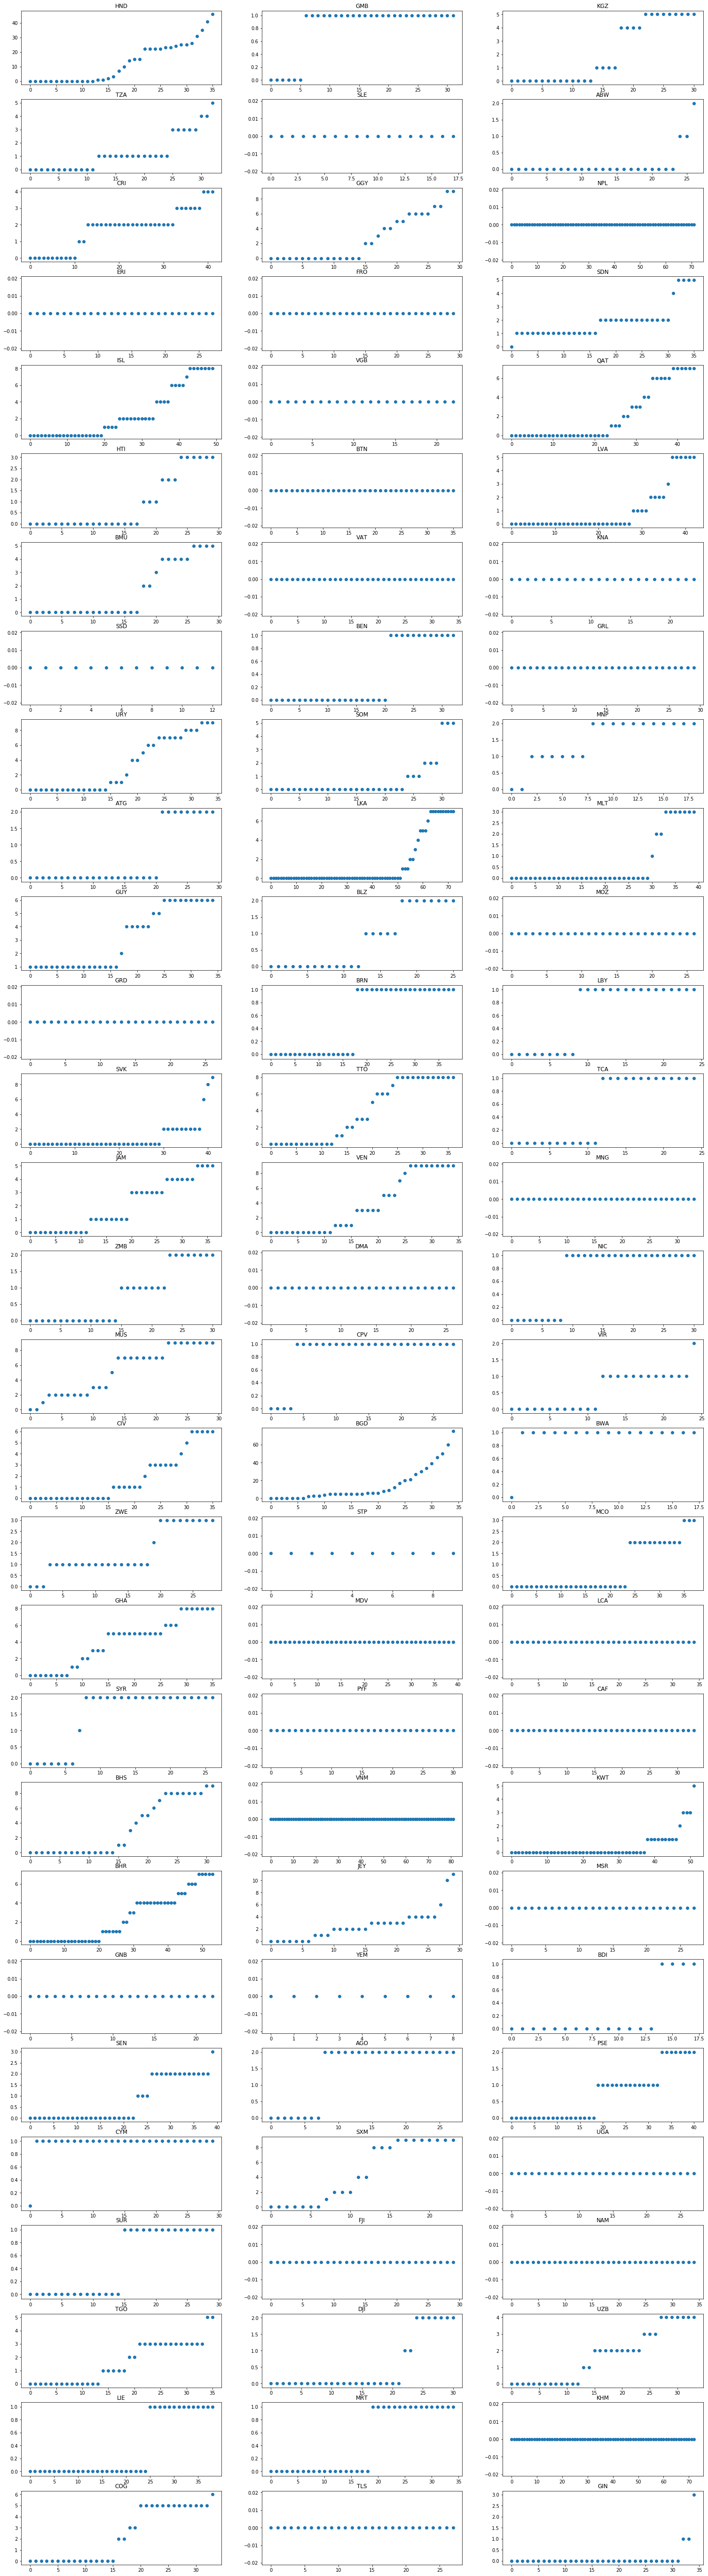

<Figure size 432x288 with 0 Axes>

In [86]:
fig, axs = plt.subplots(29, 3, figsize=(26, 100))
axs = axs.flatten()

output_zeros = {}
keys_left = []

for i, key in enumerate(no_conv):
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()
    
    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    x = np.array(range(len(new_dates)))
    y = np.array(cum_deaths)
    
    if np.max(y) <= 10:
        output_zeros[key] = np.array([0 for _ in range(14)], dtype=int)
    else:
        keys_left.append(key)
    
    if i < 87:
        axs[i].scatter(x, y)
        axs[i].set_title(key)
    
plt.show()
plt.savefig('not_fitted.png')

['HND', 'BGD', 'JEY']
HND
[23 23 24 25 25 26 31 35 41 46]
BGD
[20 21 27 30 34 39 46 50 60 75]
JEY
[ 3  3  4  4  4  4  4  6 10 11]


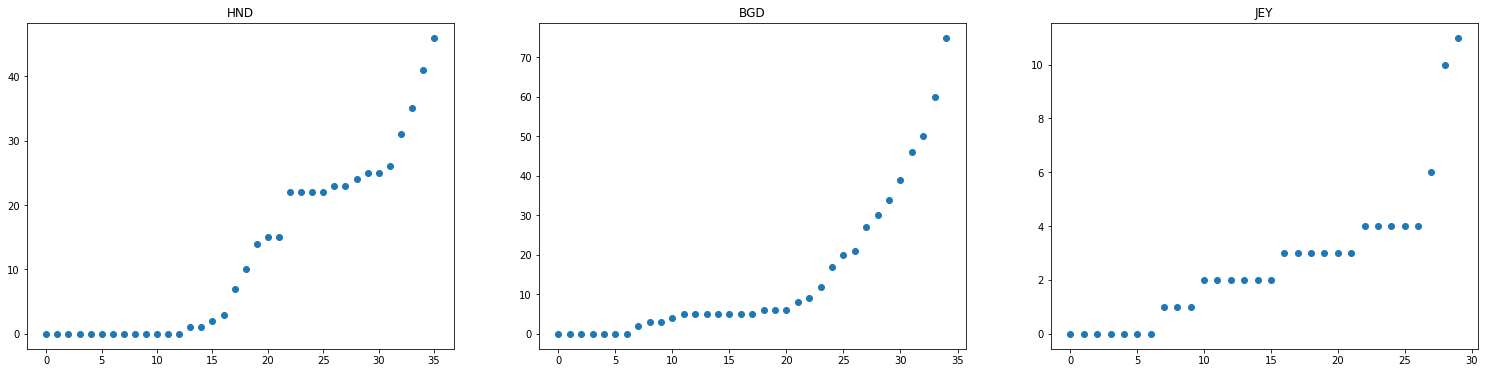

In [91]:
fig, axs = plt.subplots(1, 3, figsize=(26, 6))
axs = axs.flatten()

print(keys_left)

output_manual = {}

for i, key in enumerate(keys_left):
    country = country_data[key]
    dates = list(country['dates'])
    cases = list(country['cases'])
    deaths = list(country['deaths'])
    dates.reverse()
    cases.reverse()
    deaths.reverse()
    dates = np.array(dates)
    cum_cases = np.array(cases).cumsum()
    cum_deaths = np.array(deaths).cumsum()
    
    cum_cases = list(dropwhile(lambda x: x==0, cum_cases))
    new_dates = dates[-len(cum_cases):]
    cum_deaths = cum_deaths[-len(cum_cases):]
    
    x = np.array(range(len(new_dates)))
    y = np.array(cum_deaths)
    
    print(key)
    print(cum_deaths[-10:])
    
    if key == 'HND':
        output_manual[key] = np.array([5 for _ in range(14)], dtype=int)
    elif key == 'BGD':
        output_manual[key] = np.array([5 for _ in range(14)], dtype=int)
    elif key == 'JEY':
        output_manual[key] = np.array([1 for _ in range(14)], dtype=int)
    else:
        output_manual[key] = np.array([1 for _ in range(14)], dtype=int)
    
    axs[i].scatter(x, y)
    axs[i].set_title(key)
    
plt.show()

In [110]:
deaths_output = {}
dates_output = np.array(['2020-04-19', '2020-04-20', '2020-04-21', '2020-04-22', '2020-04-23', '2020-04-24', '2020-04-25',
                         '2020-04-26', '2020-04-27', '2020-04-28', '2020-04-29', '2020-04-30', '2020-05-01', '2020-05-02'])

for k, v in output_fitted.items():
    deaths_output[k] = v
for k, v in output_manual.items():
    deaths_output[k] = v
for k, v in output_zeros.items():
    deaths_output[k] = v
    
with open('deaths.csv', 'w') as f:
    f.write('Country,Date,Deaths\n')
    for key, values in deaths_output.items():
        for date, value in zip(dates_output, values):
            f.write(key+','+str(date)+','+str(value)+'\n')

In [103]:
new_dates

array([datetime.date(2020, 3, 20), datetime.date(2020, 3, 21),
       datetime.date(2020, 3, 22), datetime.date(2020, 3, 23),
       datetime.date(2020, 3, 24), datetime.date(2020, 3, 25),
       datetime.date(2020, 3, 26), datetime.date(2020, 3, 27),
       datetime.date(2020, 3, 28), datetime.date(2020, 3, 29),
       datetime.date(2020, 3, 30), datetime.date(2020, 3, 31),
       datetime.date(2020, 4, 1), datetime.date(2020, 4, 2),
       datetime.date(2020, 4, 3), datetime.date(2020, 4, 4),
       datetime.date(2020, 4, 5), datetime.date(2020, 4, 6),
       datetime.date(2020, 4, 7), datetime.date(2020, 4, 8),
       datetime.date(2020, 4, 9), datetime.date(2020, 4, 10),
       datetime.date(2020, 4, 11), datetime.date(2020, 4, 12),
       datetime.date(2020, 4, 13), datetime.date(2020, 4, 14),
       datetime.date(2020, 4, 15), datetime.date(2020, 4, 16),
       datetime.date(2020, 4, 17), datetime.date(2020, 4, 18)],
      dtype=object)